# CPSC 302: Assignment 2
## Nicholas Hu

### Exercise 1

#### (a)

The number of *positive* numbers in the floating-point system $(\beta, t, L, U)$ is

\begin{align*}
\text{number of (normalized) fractions} &\cdot \text{number of exponents} \\
= (\beta - 1) \beta^{t-1} &\cdot (U - L + 1).
\end{align*}

Hence the given system has $(10 - 1) 10^{2-1} \cdot (10 - (-9) + 1) = 1800$ positive numbers.

#### (b)

The number of normalized numbers in the floating-point system $(\beta, t, L, U)$ is twice the number of positive numbers (i.e., the number of positive and negative numbers) plus one (for the number zero).

\begin{align*}
2 \:\cdot\: (\text{number of (normalized) fractions} &\cdot \text{number of exponents}) + 1 \\
= 2 \cdot [(\beta - 1) \beta^{t-1} &\cdot (U - L + 1)] + 1.
\end{align*}

### Exercise 2

#### (a)

The number of *nonnegative* numbers in the floating-point system $(\beta, t, L, U)$ is the number of positive numbers plus one (for the number zero).

\begin{align*}
\text{number of (normalized) fractions} &\cdot \text{number of exponents} + 1 \\
= (\beta - 1) \beta^{t-1} &\cdot (U - L + 1) + 1.
\end{align*}

#### (b)

The given system has $(8 - 1) 8^{5-1} \cdot (100 - (-100) + 1) + 1 = 5763073$ nonnegative numbers.

#### (c)

The largest positive number is $\sum_{n=0}^{t-1} \frac{\beta - 1}{\beta^n} \times \beta^U = \sum_{n=0}^{5-1} \frac{8 - 1}{8^n} \times 8^{100} \approx 8 \times 8^{100} \approx 1.63 \times 10^{91}$.

The smallest positive number is $1 \times \beta^L = 8^{-100} \approx 4.91 \times 10^{-91}$.

#### (d)

The rounding unit is $\eta = \frac{1}{2} \beta^{1-t} = \frac{1}{2} 8^{1-5} \approx 1.22 \times 10^{-4}$.

### Exercise 3

#### (a)

In the first method, for each data point, one subtraction and one squaring is performed: $(x_i {\color{red} -} \overline{x})^{\color{red} 2}$. There are $n$ data points, so $2n$ operations are performed during the summation, with $n-1$ additions needed for the summation itself. Finally, there is one division by $n$. The total operation count is $2n + (n-1) + 1 = 3n$.

In the second method, for each data point, one squaring is performed: $x_i^{\color{red} 2}$. There are $n$ data points, so $n$ operations are performed during the summation, with $n-1$ additions needed for the summation itself. Finally, there is a division by $n$, one subtraction, and a squaring (${\color{red} -} \overline{x}^{\color{red} 2}$). The total operation count is $n + (n-1) + 1 + 2 = 2n + 2$.

#### (b)

The first method is computationally more accurate, as it avoids subtracting two potentially large numbers. The squarings of the $x_i$ in the second method may also result in loss of accuracy or overflow.

#### (c)

Let us calculate $s^2$ using both methods for $x_1 = 1.1, x_2 = 0.9$ in a floating-point system with $\beta = 10, t = 2$. For simplicity, we will omit the $\times 10^{e}$ when writing a number in this system. We will also write $0$ for the representation of zero in the system.

In both cases, $\overline{x} = \frac{1}{2.0} (1.1 + 0.90) = \frac{1}{2.0} (2.0) = 1.0$. 

With the first method,

\begin{align*}
s^2 &= \frac{1}{2.0} [(1.1 - 1.0)^2 + (0.90 - 1.0)^2] \\
&= \frac{1}{2.0} [(0.10)^2 + (-0.10)^2] \\
&= \frac{1}{2.0} [0.010 + 0.010] \\
&= \frac{1}{2.0} [0.020] \\
&= 0.010.
\end{align*}

With the second method,

\begin{align*}
s^2 &= \frac{1}{2.0} [1.1^2 + 0.90^2] - 1.0 \\
&= \frac{1}{2.0} [1.2 + 0.81] - 1.0 \\
&= \frac{1}{2.0} [2.0] - 1.0 \\
&= 1.0 - 1.0 \\
&= 0.
\end{align*}

The actual value of $s^2$ is in fact $0.01$; the first method is clearly more accurate.

### Exercise 4

#### 1.

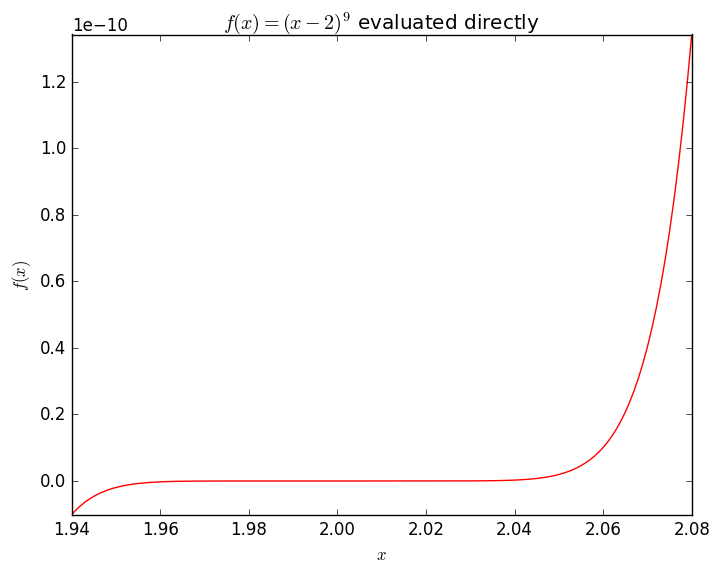

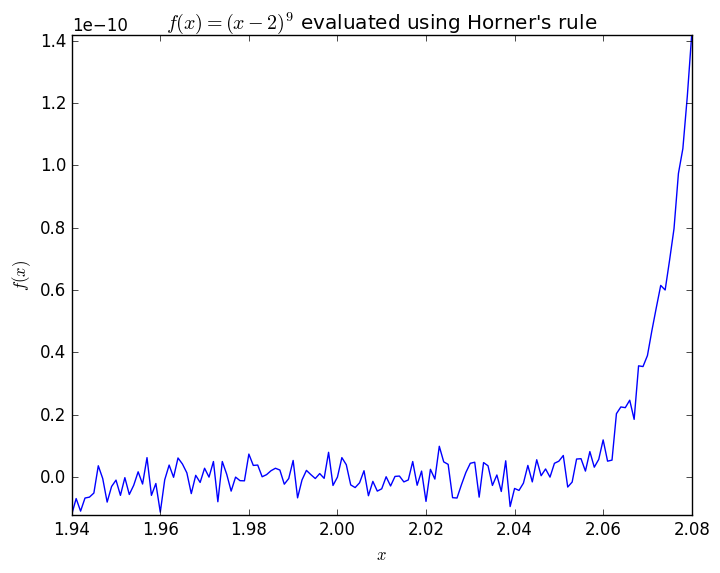

PyObject <matplotlib.text.Text object at 0x32927F10>

In [1]:
#= 
CPSC 302 Assignment 2
Nicholas Hu
=#

using PyPlot

function horner_eval(coeffs, x)
    y = 0
    
    for c in coeffs
        y = y .* x + c
    end
    
    return y
end

f(x) = (x-2).^9
f_horner(x) = horner_eval([1, -18, 144, -672, 2016, -4032, 5376, -4608, 2304, -512], x)

x = 1.94:0.001:2.08

plot(x, f(x), "r")
axis("tight")
title(L"$f(x) = (x-2)^9$ evaluated directly")
xlabel(L"$x$")
ylabel(L"$f(x)$")

figure()

plot(x, f_horner(x), "b")
axis("tight")
title(L"$f(x) = (x-2)^9$ evaluated using Horner's rule")
xlabel(L"$x$")
ylabel(L"$f(x)$")

#### 2.

The graph of $f$ evaluated using Horner's method exhibits chaotic oscillatory behaviour in the interval $[1.94, 2.08]$. This is because of the cancellation error incurred when using nested evaluation &ndash; in particular, at the last iteration, two large values (large owing to the coefficients in the expansion of $(x-2)^9$) approximately equal to each other are subtracted, so the result is very inaccurate. In contrast, direct evaluation yields a smooth graph as the exponentiation of small ($\ll 1$) values simply results in even smaller values.

#### 3.

The outcome is (b): because of the oscillations in the nested evaluation scheme, the bisection method will almost certainly bracket a false 'root' of the function; indeed, from the plot we see that $f(1.96)$ and $f(2.02)$ have the same sign, so the method will not terminate anywhere in $[1.96, 2.02]$.